# Replication code for "Brazil's Amazon Soy Moratorium reduced deforestation" 
Heilmayr, Rausch, Munger and Gibbs

## Import packages and define data location

In [1]:
# import sys
# sys.path.append('D:/dev/glue-sb/')
# import dirfuncs
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline 
import numpy as np

## Set plotting parameters

In [4]:
palette = ['#CD6699', '#448970', '#F5CA7A']
palette = {'notleg': palette[2],
           'notbiom': palette[0],
           'soym': palette[1],
           'neutral': 'black'}
fig_dir = data_dir + 'figures/'
font = {'family' : 'sans-serif',
        'weight': 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

## Load and prep data

In [5]:
data_dir = '.\\data\\'
defor_csv = data_dir + 'long.csv'
defor_df = pd.read_csv(defor_csv)

In [11]:
defor_df['late'] = defor_df['year']>2005
buffer = 300
sample_df = defor_df.loc[((defor_df['dist_amb']>-300) & (defor_df['dist_aml']<300))]

In [12]:
small_buffer = 100
small_sample_df = defor_df.loc[((defor_df['dist_amb']>-small_buffer) & (defor_df['dist_amb']<small_buffer))]

In [13]:
wide_csv = data_dir + 'wide.csv'
wide_df = pd.read_csv(wide_csv)

In [14]:
sample_df.loc[:,'gaez_soy_suit'] = (sample_df['GAEZsuit']>40).astype(int)
sample_df.loc[:,'soy_suit'] = ((sample_df['gaez_soy_suit']==1) & (sample_df['suit']>0)).astype(int)
small_sample_df.loc[:,'gaez_soy_suit'] = (small_sample_df['GAEZsuit']>40).astype(int)
small_sample_df.loc[:,'soy_suit'] = ((small_sample_df['gaez_soy_suit']==1) & (small_sample_df['suit']>0)).astype(int)
wide_df.loc[:,'gaez_soy_suit'] = (wide_df['GAEZsuit']>40).astype(int)
wide_df.loc[:,'soy_suit'] = ((wide_df['gaez_soy_suit']==1) & (wide_df['suit']>0)).astype(int)
suit_var = 'soy_suit'

C:\Users\rheil\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\rheil\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
soy_csv = data_dir + 'soy_conversion.csv'
soy_df = pd.read_csv(soy_csv)

In [16]:
# Regression results - generated by running regressions.do
t1_csv = data_dir + 'tables/t1_ddd.csv'
t2_csv = data_dir + 'tables/t2.csv'
tb_csv = data_dir + 'tables/tsb.csv'

## Figure 2 - Primary trend comparison

In [17]:
out_var = 'mb2_vdefor'
defor = pd.pivot_table(sample_df, columns = 'year', index = [suit_var, 'biome', 'legal_amazon'], values = out_var, 
                       aggfunc = 'sum')
forest = pd.pivot_table(sample_df, columns = 'year', index = [suit_var, 'biome', 'legal_amazon'], values = out_var, 
                        aggfunc = 'count')
defor_shr = ((defor / forest) * 100).dropna(axis = 1).T.loc[2002:2016]
defor_shr = defor_shr.T

In [18]:
def clean_time(time_csv):
    time_df = pd.read_csv(time_csv)
    time_df = time_df.iloc[1:-1]
    time_df.columns = ['var', 'estimate']
    time_df.loc[:,'var'] = np.repeat(time_df['var'].dropna(), 2).values
    time_df.loc[:,'stat'] = np.tile(['coef', 'ci'], int((time_df.shape[0]/2)))
    time_df = time_df.set_index(['stat', 'var'])
    time_df = time_df.unstack().T.reset_index()
    soy_rows = [var for var in time_df['var'] if (suit_var in var) & ('biome' in var) & ('year' in var)]
    df = time_df.loc[time_df['var'].isin(soy_rows)]
    df.loc[:,'year'] = df['var'].apply(lambda x: int(x[:4]))
    df.loc[:,'coef'] = df['coef'].apply(lambda x: float(x)) * 100
    df.loc[:,'lb'] = df['ci'].apply(lambda x: float(x.split(',')[0])) * 100
    df.loc[:,'ub'] = df['ci'].apply(lambda x: float(x.split(',')[1])) * 100
    df.loc[:,'err'] = df.loc[:,'coef'] - df.loc[:,'lb']
    return df


In [19]:
time_csv = data_dir + 'figures/f2_time_plot.csv'
soytime_df = clean_time(time_csv)

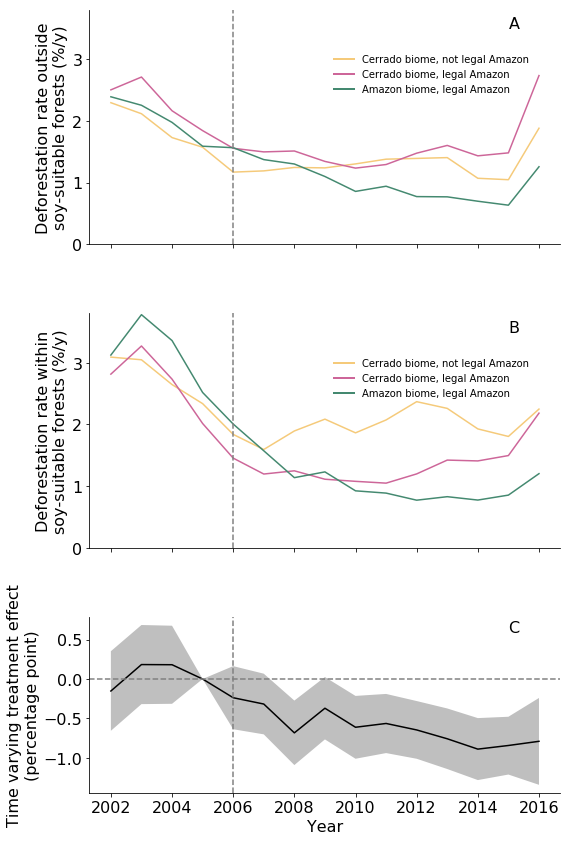

In [20]:
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 2, 1.5]) 
fig = plt.figure(figsize=(8,12))
ax2 = plt.subplot(gs[2])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex = ax0, sharey = ax0)
ax0.plot(defor_shr.columns, defor_shr.loc[(0,0,0)], color = palette['notleg'], linestyle = '-')
ax0.plot(defor_shr.columns, defor_shr.loc[(0,0,1)], color = palette['notbiom'], linestyle = '-')
ax0.plot(defor_shr.columns, defor_shr.loc[(0,1,1)], color = palette['soym'], linestyle = '-')
ax1.plot(defor_shr.columns, defor_shr.loc[(1,0,0)], color = palette['notleg'], linestyle = '-')
ax1.plot(defor_shr.columns, defor_shr.loc[(1,0,1)], color = palette['notbiom'], linestyle = '-')
ax1.plot(defor_shr.columns, defor_shr.loc[(1,1,1)], color = palette['soym'], linestyle = '-')
sns.despine()
handles = [plt.Line2D(range(10), range(10), linestyle='-', color = palette['notleg'], linewidth = 2),
           plt.Line2D(range(10), range(10), linestyle='-', color = palette['notbiom'], linewidth = 2),
           plt.Line2D(range(10), range(10), linestyle='-', color = palette['soym'], linewidth = 2)]
ax0.set_ylabel('Deforestation rate outside\nsoy-suitable forests (%/y)')
ax1.set_ylabel('Deforestation rate within\nsoy-suitable forests (%/y)')
ax2.set_xlabel('Year')
ax0.axvline(x = 2006, color = 'grey', linestyle = '--')
ax1.axvline(x = 2006, color = 'grey', linestyle = '--')
labels = ['Cerrado biome, not legal Amazon', 'Cerrado biome, legal Amazon', 'Amazon biome, legal Amazon']
ax2.set_ylabel('Time varying treatment effect\n(percentage point)')
ax2.plot(soytime_df['year'].values, soytime_df['coef'].values, color = 'black')
ax2.fill_between(soytime_df['year'], soytime_df['lb'], soytime_df['ub'], alpha = 0.5, facecolor='grey', interpolate=False)
ax0.set_xticklabels([])
ax1.set_xticklabels([])
ax0.set_ylim((0,3.8))
ax2.axvline(x = 2006, color = 'grey', linestyle = '--')
ax2.axhline(y = 0, color = 'grey', linestyle = '--')
sns.despine()
ax0.annotate("A", xy = (2015, 3.5))
ax1.annotate("B", xy = (2015, 3.5))
ax2.annotate("C", xy = (2015, 0.6))
lgd = ax0.legend(handles, labels, fontsize = 10, frameon = False, loc='lower left', bbox_to_anchor=(0.5, 0.6))
lgd = ax1.legend(handles, labels, fontsize = 10, frameon = False, loc='lower left', bbox_to_anchor=(0.5, 0.6))
fig.tight_layout()
fig.savefig(data_dir + 'figures/f2_summary.svg')

# Figure S4 - Spatially bounded version of Figure 2

In [21]:
out_var = 'mb2_vdefor'
small_sample_df.loc[:,'soy_suit'] = ((small_sample_df['gaez_soy_suit']==1) & (small_sample_df['suit']>0)).astype(int)
defor = pd.pivot_table(small_sample_df, columns = 'year', index = [suit_var, 'biome', 'legal_amazon'], values = out_var, 
                       aggfunc = 'sum')
forest = pd.pivot_table(small_sample_df, columns = 'year', index = [suit_var, 'biome', 'legal_amazon'], values = out_var, 
                        aggfunc = 'count')
defor_shr = ((defor / forest) * 100).dropna(axis = 1).T.loc[2002:2016]
defor_shr = defor_shr.T
time_csv = data_dir + 'figures/f2_time_plot_100.csv'
soytime_df = clean_time(time_csv)

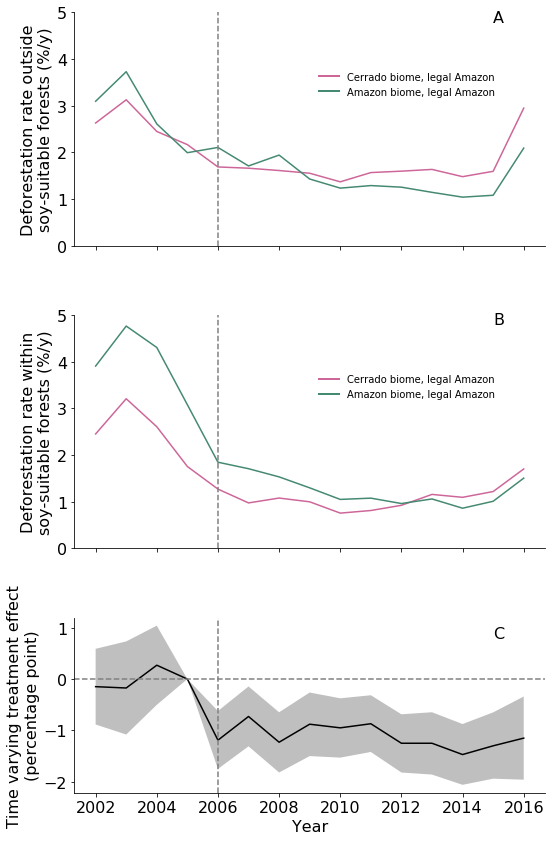

In [22]:
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 2, 1.5]) 
fig = plt.figure(figsize=(8,12))
ax2 = plt.subplot(gs[2])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex = ax0, sharey = ax0)
ax0.plot(defor_shr.columns, defor_shr.loc[(0,0,1)], color = palette['notbiom'], linestyle = '-')
ax0.plot(defor_shr.columns, defor_shr.loc[(0,1,1)], color = palette['soym'], linestyle = '-')
ax1.plot(defor_shr.columns, defor_shr.loc[(1,0,1)], color = palette['notbiom'], linestyle = '-')
ax1.plot(defor_shr.columns, defor_shr.loc[(1,1,1)], color = palette['soym'], linestyle = '-')
sns.despine()
handles = [plt.Line2D(range(10), range(10), linestyle='-', color = palette['notbiom'], linewidth = 2),
           plt.Line2D(range(10), range(10), linestyle='-', color = palette['soym'], linewidth = 2)]
ax0.set_ylabel('Deforestation rate outside\nsoy-suitable forests (%/y)')
ax1.set_ylabel('Deforestation rate within\nsoy-suitable forests (%/y)')
ax2.set_xlabel('Year')
ax0.axvline(x = 2006, color = 'grey', linestyle = '--')
ax1.axvline(x = 2006, color = 'grey', linestyle = '--')
labels = ['Cerrado biome, legal Amazon', 'Amazon biome, legal Amazon']
ax2.set_ylabel('Time varying treatment effect\n(percentage point)')
ax2.plot(soytime_df['year'].values, soytime_df['coef'].values, color = 'black')
ax2.fill_between(soytime_df['year'], soytime_df['lb'], soytime_df['ub'], alpha = 0.5, facecolor='grey', interpolate=False)
ax0.set_xticklabels([])
ax1.set_xticklabels([])
ax0.set_ylim((0,5))
ax2.axvline(x = 2006, color = 'grey', linestyle = '--')
ax2.axhline(y = 0, color = 'grey', linestyle = '--')
sns.despine()
ax0.annotate("A", xy = (2015, 4.8))
ax1.annotate("B", xy = (2015, 4.8))
ax2.annotate("C", xy = (2015, 0.8))
lgd = ax0.legend(handles, labels, fontsize = 10, frameon = False, loc='lower left', bbox_to_anchor=(0.5, 0.6))
lgd = ax1.legend(handles, labels, fontsize = 10, frameon = False, loc='lower left', bbox_to_anchor=(0.5, 0.6))
fig.tight_layout()
fig.savefig(data_dir + 'figures/fs2_summary.svg')

## Figure 3 - Soy establishment trends

In [23]:
soy_df = soy_df.loc[(soy_df['dist_amb']>-300) & (soy_df['dist_aml']<300)]
soy_subset = soy_df.loc[soy_df['a_start_soy']==0]

In [24]:
soy_subset.loc[(soy_subset['year']==2017) & (soy_subset['biome']==1), 'mb_start_for'].value_counts()

1.0    147129
0.0     96397
Name: mb_start_for, dtype: int64

In [25]:
soy_subset.loc[(soy_subset['year']==2017) & (soy_subset['biome']==1) & (soy_subset['mb_start_for']==0), 'a_soy'].value_counts()

0    89613
1     6784
Name: a_soy, dtype: int64

In [26]:
summary_df = pd.pivot_table(soy_subset, index = 'a_soy', 
                            columns = ['year', 'mb_start_for', 'legal_amazon', 'biome'], values = 'ptid', aggfunc = len)
convert_df = (summary_df.loc[1] / (summary_df.loc[0] + summary_df.loc[1])).unstack(level=0)*100
convert_df = convert_df.rename(columns = {2006: '2000-2006', 2017: '2007-2017'})

In [27]:
convert_df

year                             2000-2006  2007-2017
mb_start_for legal_amazon biome                      
0.0          0            0       3.508585   6.448073
                          1            NaN        NaN
             1            0       5.524295   8.508882
                          1       2.043240   7.056670
1.0          0            0       0.970160   2.262443
                          1            NaN        NaN
             1            0       1.133209   1.098507
                          1       0.671215   0.530984

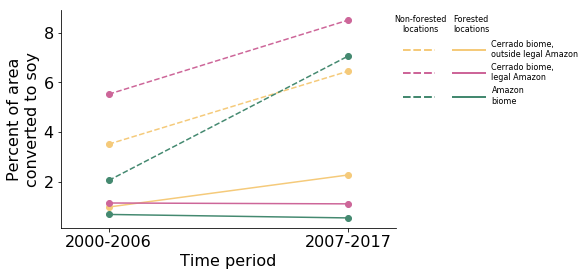

In [28]:
fig, ax = plt.subplots()
ax.plot(convert_df.loc[(0,0,0)], marker = 'o', linestyle = '--', color = palette['notleg'])
ax.plot(convert_df.loc[(0,1,0)], marker = 'o', linestyle = '--', color = palette['notbiom'])
ax.plot(convert_df.loc[(0,1,1)], marker = 'o', linestyle = '--', color = palette['soym'])
ax.plot(convert_df.loc[(1,0,0)], marker = 'o', linestyle = '-', color = palette['notleg'])
ax.plot(convert_df.loc[(1,1,0)], marker = 'o', linestyle = '-', color = palette['notbiom'])
ax.plot(convert_df.loc[(1,1,1)], marker = 'o', linestyle = '-', color = palette['soym'])
ax.set_ylabel('Percent of area\nconverted to soy')
ax.set_xlabel('Time period')
ax.set_xlim((-0.2, 1.2))

sns.despine()
handle_len = 50
handles = [plt.Line2D(range(handle_len), range(handle_len), linestyle='-', color = palette['notleg'], linewidth = 2),
           plt.Line2D(range(handle_len), range(handle_len), linestyle='-', color = palette['notbiom'], linewidth = 2),
           plt.Line2D(range(handle_len), range(handle_len), linestyle='-', color = palette['soym'], linewidth = 2)]
labels = ['Cerrado biome,\noutside legal Amazon', 'Cerrado biome,\nlegal Amazon', 'Amazon\nbiome']
lgd1 = ax.legend(handles, labels, fontsize = 8, frameon = False, loc = "upper left", bbox_to_anchor=(1.15,.9), handlelength = 4)
handles = [plt.Line2D(range(handle_len), range(handle_len), linestyle='--', color = palette['notleg'], linewidth = 2),
           plt.Line2D(range(handle_len), range(handle_len), linestyle='--', color = palette['notbiom'], linewidth = 2),
           plt.Line2D(range(handle_len), range(handle_len), linestyle='--', color = palette['soym'], linewidth = 2)]
labels = ['\n', '\n', '\n']
lgd2 = ax.legend(handles, labels, fontsize = 8, frameon = False, loc = "upper left", bbox_to_anchor=(1.,.9), handlelength=4)
ax.add_artist(lgd1)
ax.add_artist(lgd2)
ax.annotate('Non-forested\nlocations', xy = (1.075, 0.90), xycoords = "axes fraction", fontsize = 8, ha="center")
ax.annotate('Forested\nlocations', xy = (1.225, 0.90), xycoords = "axes fraction", fontsize = 8, ha="center")
fig.savefig(data_dir + 'figures/f3_conversion.svg', bbox_inches = 'tight')

## Create Figure S1 - Comparison to full Amazon

In [29]:
defor = pd.pivot_table(sample_df, columns = 'year', index = ['biome', 'legal_amazon'], values = out_var, 
                       aggfunc = 'sum')
forest = pd.pivot_table(sample_df, columns = 'year', index = ['biome', 'legal_amazon'], values = out_var, 
                        aggfunc = 'count')
defor_shr = ((defor / forest) * 100).dropna(axis = 1).T.loc[2002:2016]
defor_shr = defor_shr.T
defor_all = pd.pivot_table(defor_df, columns = 'year', index = ['biome', 'legal_amazon'], values = out_var, 
                       aggfunc = 'sum')
forest_all = pd.pivot_table(defor_df, columns = 'year', index = ['biome', 'legal_amazon'], values = out_var, 
                        aggfunc = 'count')
defor_shr_all = ((defor_all / forest_all) * 100).dropna(axis = 1).T.loc[2002:2016]
defor_shr_all = defor_shr_all.T

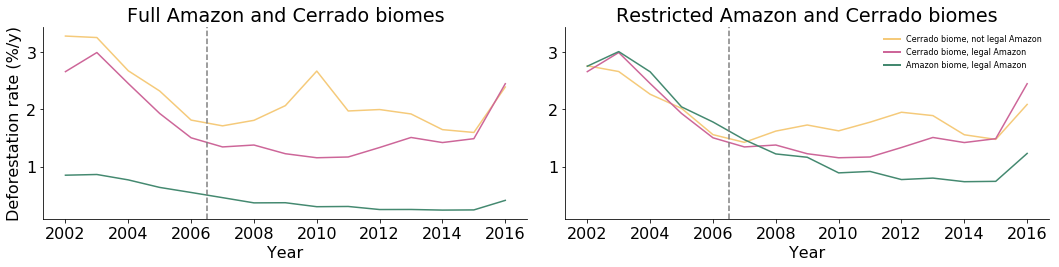

In [30]:
gs = gridspec.GridSpec(1, 2) 
fig = plt.figure(figsize=(15,4))
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex = ax0, sharey = ax0)
ax0.plot(defor_shr.columns, defor_shr_all.loc[(0, 0)], color = palette['notleg'], linestyle = '-')
ax0.plot(defor_shr.columns, defor_shr_all.loc[(0, 1)], color = palette['notbiom'], linestyle = '-')
ax0.plot(defor_shr.columns, defor_shr_all.loc[(1, 1)], color = palette['soym'], linestyle = '-')
ax1.plot(defor_shr.columns, defor_shr.loc[(0, 0)], color = palette['notleg'], linestyle = '-')
ax1.plot(defor_shr.columns, defor_shr.loc[(0, 1)], color = palette['notbiom'], linestyle = '-')
ax1.plot(defor_shr.columns, defor_shr.loc[(1, 1)], color = palette['soym'], linestyle = '-')
sns.despine()
handles = [plt.Line2D(range(10), range(10), linestyle='-', color = palette['notleg'], linewidth = 2),
           plt.Line2D(range(10), range(10), linestyle='-', color = palette['notbiom'], linewidth = 2),
           plt.Line2D(range(10), range(10), linestyle='-', color = palette['soym'], linewidth = 2)]
ax0.set_ylabel('Deforestation rate (%/y)')
ax0.set_xlabel('Year')
ax1.set_xlabel('Year')
ax0.axvline(x = 2006.5, color = 'grey', linestyle = '--')
ax1.axvline(x = 2006.5, color = 'grey', linestyle = '--')
labels = ['Cerrado biome, not legal Amazon', 'Cerrado biome, legal Amazon', 'Amazon biome, legal Amazon']
lgd = ax1.legend(handles, labels, fontsize = 8, frameon = False)
ax0.set_title("Full Amazon and Cerrado biomes")
ax1.set_title("Restricted Amazon and Cerrado biomes")
sns.despine()
fig.tight_layout()
ax0.xaxis.set_ticks(np.arange(2002, 2018, 2))
fig.savefig(data_dir + 'figures/methods_s1.svg')

## Paper calculations
### Impact calculations
Our econometric models isolate and quantify the ASM’s impacts by comparing relative trends in deforestation rates across biomes and soy suitability classes (Table 1). Relative to the Cerrado portion of the Legal Amazon, the annual deforestation rate on soy-suitable locations declined by 0.70 ± 0.37 pp in the Amazon biome after the adoption of the ASM (all error bounds describe the 95% confidence interval). Similarly, post-ASM deforestation in soy-suitable regions of the Amazon biome declined by 0.98 ± 0.25 pp relative to non-soy-suitable portions of the biome. Using a triple-differences model that integrates both of these comparisons, we estimate that the ASM reduced annual deforestation by 0.66 ± 0.32 pp. This smaller estimated effect reflects the fact that soy-suitable areas of the Cerrado biome also experienced a relative decline (0.42 ± 0.23 pp) in deforestation in the latter half of our study period. To quantify what would have happened had the ASM never been adopted, we construct a counterfactual scenario in which we add our estimated treatment effect (0.64 +/- 0.32 pp) to historical 2006-2016 deforestation rates. When compared to this counterfactual, the ASM reduced deforestation rates by 34% +/- 16, contributing 18 +/- 9 thousand km2 of avoided deforestation in the Amazon biome. 

In [31]:
# Load regression table
t1 = pd.read_csv(t1_csv)
t1 = t1.loc[1:7]
t1.columns = ['drop', 'c1', 'c2', 'c3', 'c4', 'c5']
labels = ['soy_post_coef', 'soy_post_se', 'biome_post_coef', 'biome_post_se', 'ddd_coef', 'ddd_se', 'n']
t1['var'] = labels 
t1 = t1.drop('drop', axis = 1)
t1 = t1.replace(r'["=() ]','', regex = True)
t1

,c1,c2,c3,c4,c5,var
1,-0.00975,-0.00420,,,-0.00330,soy_post_coef
2,0.00126,0.00116,,,0.00122,soy_post_se
3,,,-0.00696,-0.00129,-0.000208,biome_post_coef
4,,,0.00189,0.00107,0.00126,biome_post_se
5,,,,,-0.00656,ddd_coef
6,,,,,0.00163,ddd_se
7,2130621,1484648,1830393,1840783,3671176,n


In [32]:
coef = t1.loc[t1['var']=='biome_post_coef', 'c3'].astype(float).values[0]
se = t1.loc[t1['var']=='biome_post_se', 'c3'].astype(float).values[0].astype(float)
ci = 1.96 * se
print(coef, ci)

-0.00696 0.0037044


In [33]:
coef = t1.loc[t1['var']=='soy_post_coef', 'c1'].astype(float).values[0]
se = t1.loc[t1['var']=='soy_post_se', 'c1'].astype(float).values[0].astype(float)
ci = 1.96 * se
print(coef, ci)

-0.00975 0.0024696


In [34]:
att = t1.loc[t1['var']=='ddd_coef', 'c5'].astype(float).values[0]
att_se = t1.loc[t1['var']=='ddd_se', 'c5'].astype(float).values[0].astype(float)
att_ci = 1.96 * att_se
print(att, att_ci)

-0.00656 0.0031948


In [35]:
coef = t1.loc[t1['var']=='soy_post_coef', 'c2'].astype(float).values[0]
se = t1.loc[t1['var']=='soy_post_se', 'c2'].astype(float).values[0].astype(float)
ci = 1.96 * se
print(coef, ci)

-0.0042 0.0022736


In [36]:
out_var = 'mb2_vdefor'
defor = pd.pivot_table(sample_df, columns = 'year', index = ['soy_suit', 'biome', 'legal_amazon'], values = out_var, 
                       aggfunc = 'sum')
start_forest = pd.pivot_table(sample_df, columns = 'year', index = ['soy_suit', 'biome', 'legal_amazon'], values = out_var, 
                        aggfunc = 'count')
defor_shr = ((defor / start_forest) * 100).dropna(axis = 1).T.loc[2002:2016]
defor_shr = defor_shr.T

In [37]:
bl_defor = (100-defor_shr.loc[(1,1,1), 2006:])/100
bl_cumdefor = bl_defor.cumprod().loc[2016]
start_for_05 = start_forest.loc[(1,1,1), 2006]
bl_forests = start_for_05 * bl_cumdefor
total_defor = (start_forest.loc[(1,1,1), 2006] - start_forest.loc[(1,1,1), 2017]) * 4

att_draw = np.random.normal(att, att_se, 10000)
cf_forests = pd.Series(map(lambda att: start_for_05 * ((att + bl_defor).cumprod().loc[2016]), att_draw))
avoided_defor = (bl_forests - cf_forests) * 4
mean = np.mean(avoided_defor)
std = np.std(avoided_defor)
ci = std * 1.96

In [38]:
print("ASM saved " + str(int(mean)) + ' +/- ' + str(ci) + ' km2 of forests')
pct_reduction = mean / (total_defor + mean)
pct_reduction_ci = ci / (total_defor + mean)
print("ASM reduced total deforestation by " + str(int(100*pct_reduction)) + ' +/- ' + str(int(100*pct_reduction_ci)) + " percent")

ASM saved 18252 +/- 8536.803042482952 km2 of forests
ASM reduced total deforestation by 35 +/- 16 percent


In [39]:
out_var = 'mb2_vdefor'
defor = pd.pivot_table(sample_df, columns = 'year', index = ['biome', 'legal_amazon'], values = out_var, 
                       aggfunc = 'sum')
start_forest = pd.pivot_table(sample_df, columns = 'year', index = ['biome', 'legal_amazon'], values = out_var, 
                        aggfunc = 'count')
defor_shr = ((defor / start_forest) * 100).dropna(axis = 1).T.loc[2002:2016]
defor_shr = defor_shr.T
defor_shr.loc[1,1]

year
2002    2.757771
2003    3.014041
2004    2.660198
2005    2.045254
2006    1.780413
2007    1.469617
2008    1.220725
2009    1.162376
2010    0.888757
2011    0.913861
2012    0.771697
2013    0.797305
2014    0.734175
2015    0.740342
2016    1.229487
Name: (1, 1), dtype: float64

### Complementarities with public policies
In addition, our estimate of the impact of the ASM represents only 25 percent of the 2.6 pp reduction in deforestation rates that occurred between 2002 and 2016 on soy-suitable locations in the Amazon biome portion of the Arc of Deforestation.

In [40]:
out_var = 'mb2_vdefor'
defor = pd.pivot_table(sample_df, columns = 'year', index = [suit_var, 'biome', 'legal_amazon'], values = out_var, 
                       aggfunc = 'sum')
forest = pd.pivot_table(sample_df, columns = 'year', index = [suit_var, 'biome', 'legal_amazon'], values = out_var, 
                        aggfunc = 'count')
defor_shr = ((defor / forest) * 100).dropna(axis = 1).T.loc[2002:2016]
defor_shr = defor_shr.T

In [41]:
reduction = (defor_shr.loc[(1,1,1)][2003] - defor_shr.loc[(1,1,1)][2016])
print(reduction)

2.5775838107536533


In [42]:
att * -100 / reduction

0.25450190882762946

In [43]:
# Load regression table
tb = pd.read_csv(tb_csv)
tb = tb.loc[0:15]
tb.columns = ['drop', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7']
variables = ['a', 'a', 'b', 'b', 'c', 'c', 'd', 'd', 'e', 'e', 'f', 'f', 'leg_am', 'leg_am', 'g', 'g']
tb['var'] = variables 
stats = ['coef', 'se'] * 8
tb['stat'] = stats
tb = tb.drop('drop', axis = 1)
tb = tb.replace(r'["=() ]','', regex = True)
coef = tb.loc[(tb['var']=='leg_am') & (tb['stat']=='coef'), 'c6'].astype(float).values[0]
se = tb.loc[(tb['var']=='leg_am') & (tb['stat']=='se'), 'c6'].astype(float).values[0]
ci = 1.96 * se
print(coef, ci)

-0.00457 0.0043512


In [44]:
# Load regression table
t2 = pd.read_csv(t2_csv)
t2 = t2.replace(r'["=() ]','', regex = True)
t2 = t2.loc[2:11]
t2.columns = ['var', 'c1', 'c2', 'c3', 'c4']

t2

,var,c1,c2,c3,c4
2,a,-0.00656***,-0.00237,-0.00548***,-0.00160
3,a_p,.0021715324931663,.2775146431325373,.0079641851698686,.4566347246261224
4,c,,00.00007,,-0.00050
5,c_p,,.9535567992689056,,.6985651165702974
6,ac,,-0.01174***,,-0.01146***
7,ac_p,,5.93743792672e-06,,3.33221263757e-06
8,ag,,,-0.01300***,-0.01141***
9,ag_p,,,3.15049662595e-07,7.37927915123e-06
10,acg,,,,-0.01526***
11,acg_p,,,,2.62764615930e-07


### Research design
Since 90 percent of soy is planted in locations that meet specific soil and climatic suitability conditions, 

In [45]:
subset = wide_df.loc[(wide_df['dist_amb']>-buffer) & (wide_df['dist_aml']<buffer)]
suit_df = subset.pivot_table(index = 'a_soy_2017', columns = suit_var, values = 'ptid', aggfunc = len).loc[1]
suit_df[[1,2]].sum() / suit_df.sum()

C:\Users\rheil\AppData\Roaming\Python\Python36\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


0.8951466817230104

### Avoided deforestation
Before the adoption of the ASM, deforestation rates were slightly higher on soy-suitable lands in the Amazon biome (3.2% per year) than within the Cerrado portion of the Legal Amazon (2.7% per year) as well as the portion of the Cerrado biome outside of the Legal Amazon (2.8% per year). Between 2006 and 2016, soy-suitable deforestation rates in the Amazon biome fell to 1.1% per year—0.24 percentage points (pp) per year below the rate of soy-suitable deforestation in the Cerrado portion of the Legal Amazon, and 0.89 pp per year below the rate in the Cerrado biome outside of the Legal Amazon. 

In [46]:
defor = pd.pivot_table(sample_df.loc[sample_df['soy_suit']==1], columns = 'year', index = ['biome', 'legal_amazon'], values = 'mb2_vdefor', 
                       aggfunc = 'sum')
forest = pd.pivot_table(sample_df.loc[sample_df['soy_suit']==1], columns = 'year', index = ['biome', 'legal_amazon'], values = 'mb2_vdefor', 
                        aggfunc = 'count')
defor_shr = ((defor / forest) * 100).dropna(axis = 1).T.loc[2002:2017]
defor_shr = defor_shr.T
defor_shr[list(range(2002, 2006))].mean(axis = 1)

biome  legal_amazon
0      0               2.780932
       1               2.709260
1      0               0.467290
       1               3.195651
dtype: float64

In [47]:
p2_rates = defor_shr[list(range(2006, 2017))].mean(axis = 1)
p2_rates

biome  legal_amazon
0      0               1.996282
       1               1.349211
1      0               0.351380
       1               1.107928
dtype: float64

In [48]:
p2_rates.loc[(0,1)] - p2_rates.loc[(1,1)]

0.2412832234781781

In [49]:
p2_rates.loc[(0,0)] - p2_rates.loc[(1,1)]

0.888354110620238

## Methods calculations
### Study region
This region captures 96 percent of the 2017 soy area in the Amazon biome as well as 96 percent of the area of forests converted to soy between 2000 and 2017. In addition, our study region contains almost all (94 percent) of the forests monitored by the Soy Working Group (GTS) between 2007 and 2014. 

In [50]:
defor_df['arc'] = (defor_df['dist_amb']>-300) & (defor_df['dist_aml']<300)

In [51]:
defor = pd.pivot_table(defor_df.loc[defor_df['biome']==1], columns = 'year', 
                       index = 'arc', values = 'a_soy_2017', aggfunc = 'sum')
defor = defor.sum(axis = 1)
defor[True] / defor.sum()

0.9621263974446727

In [52]:
soy_defor = pd.pivot_table(defor_df.loc[(defor_df['biome']==1) & (defor_df['a_soy_2017']==1)], columns = 'year', 
                       index = 'arc', values = 'mb2_vdefor', aggfunc = 'sum')
soy_defor = soy_defor.sum(axis = 1)
soy_defor[True] / soy_defor.sum()

0.9623817216708977

In [53]:
subset = defor_df.loc[(defor_df['mb2_vfor_2000']==1) & (defor_df['year']<2015)]
ever_gts = subset.pivot_table(index = 'ptid', values = 'gts', aggfunc = max)
ever_arc = subset.pivot_table(index = 'ptid', values = 'arc', aggfunc = max)
ever_gts = ever_gts.merge(ever_arc, left_index = True, right_index = True, how = 'left')
ctab = pd.crosstab(ever_gts['gts'], ever_gts['arc'])
ctab.loc[1, True] / ctab.loc[1].sum()

0.9442789242404616

### Sample creation
Across our study region, we sampled observations at each vertex of a grid of evenly spaced (2km) horizontal and vertical lines. This produced 616,274 sample points with 369,331 of those points falling inside the Amazon biome and 246,943 points falling inside the Cerrado biome.  For each of these points, we extracted data from a variety of sources as outlined below.

In [54]:
buffer = 300
subset = wide_df.loc[(wide_df['dist_amb']>-buffer) & (wide_df['dist_aml']<buffer)]
pt_description = subset.pivot_table(index = 'biome', values = 'ptid', aggfunc = len)

In [55]:
pt_description

,ptid
biome,
0,369331
1,246943


In [56]:
pt_description.sum()

ptid    616274
dtype: int64

In [57]:
# Show that this generates same forest sample as primary model specification
subset = wide_df.loc[(wide_df['dist_amb']>-buffer) & (wide_df['dist_aml']<buffer) & (wide_df['legal_amazon']==1) & ((wide_df['mb2_y_defor']>=2002) | (pd.isnull(wide_df['mb2_y_defor'])))]
pt_description = subset.pivot_table(index = 'biome', columns = 'mb2_vfor_2000', values = 'ptid', aggfunc = len)
pt_description[1].sum()

279363

### Functional form
However, given that annual deforestation events are relatively rare (mean annual deforestation = 1.58), a non-linear functional form might better represent our binary outcome variable.

In [58]:
out_var = 'mb2_vdefor'
defor = pd.pivot_table(sample_df, columns = 'year', index = ['legal_amazon'], values = out_var, 
                       aggfunc = 'sum')
forest = pd.pivot_table(sample_df, columns = 'year', index = ['legal_amazon'], values = out_var, 
                        aggfunc = 'count')
defor_shr = ((defor / forest) * 100).dropna(axis = 1).T.loc[2002:2016]
defor_shr[1].mean()

1.5815028284185186

### Point and property fixed effects
To estimate this model we restricted our sample to the 61 percent of points that fell within a property listed in one of the state or federal registries. 

In [59]:
subset = wide_df.loc[(wide_df['dist_amb']>-buffer) & (wide_df['dist_aml']<buffer) & (wide_df['legal_amazon']==1)]
(subset['propid'].notnull()).astype(int).describe()['mean']

0.6112589221820584